In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [115]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)


In [116]:
#dropping features that have more than 80% missing
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [117]:
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [118]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['Electrical'] = train['Electrical'].fillna('SBrkr')

numerical = ['MasVnrArea','GarageYrBlt', 'TotalBsmtSF','GarageArea','GarageCars','BsmtUnfSF',
'BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']
for col in numerical:
    train[col] = train[col].fillna(0)

for column in ['KitchenQual', 'Electrical', 'SaleType','Exterior1st', 'Exterior2nd', 'Functional','Utilities', 'MSZoning']:
    train[column].fillna(train[column].mode()[0], inplace=True)
    
#fill NA columns with NE ('Not Exist') or 0 because not having a particular feature doesn't mean the observation for that feature is missing

In [119]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['Electrical'] = test['Electrical'].fillna('SBrkr')

numerical = ['MasVnrArea','GarageYrBlt', 'TotalBsmtSF','GarageArea','GarageCars','BsmtUnfSF',
'BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']
for col in numerical:
    test[col] = test[col].fillna(0)

for column in ['KitchenQual', 'Electrical', 'SaleType','Exterior1st', 'Exterior2nd', 'Functional','Utilities', 'MSZoning']:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [120]:
missing = np.sum(train.isnull())
low_missing = (missing[missing>0]/train.shape[0]).sort_values(ascending = False)

for i in low_missing[low_missing<0.0007].index:
    train[i].fillna(train[i].mode()[0], inplace=True)

#Filling in missing values that are less than 0.0007 with mode 

In [121]:
missing = np.sum(test.isnull())
low_missing = (missing[missing>0]/test.shape[0]).sort_values(ascending = False)

for i in low_missing[low_missing<0.0007].index:
    test[i].fillna(test[i].mode()[0], inplace=True)
#Filling in missing values that are less than 0.0007 with mode 

In [122]:
from sklearn.impute import KNNImputer

LotFrontage = train['LotFrontage'].tolist()
FlrSF = train['1stFlrSF'].tolist()
LotArea = train['LotArea'].tolist()
GrLivArea = train['GrLivArea'].tolist()
data = {'LotFrontage': LotFrontage, '1FlrSF':FlrSF, 'LotArea' :LotArea, 'GrLivArea': GrLivArea}
lot = pd.DataFrame(data)


imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1, 1461))

train['LotFrontage'] = lot_imputed['LotFrontage']

In [123]:
from sklearn.impute import KNNImputer

LotFrontage = test['LotFrontage'].tolist()
FlrSF = test['1stFlrSF'].tolist()
LotArea = test['LotArea'].tolist()
GrLivArea = test['GrLivArea'].tolist()
data = {'LotFrontage': LotFrontage, '1FlrSF':FlrSF, 'LotArea' :LotArea, 'GrLivArea': GrLivArea}
lot = pd.DataFrame(data)


imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1461, 2920))

test['LotFrontage'] = lot_imputed['LotFrontage']

In [124]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['MoSold'] = train['MoSold'].apply(str)

#Convert "numerical" features to categorical features

In [130]:
train['YrSold'] = train['YrSold'].apply(str)

In [125]:
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)


In [131]:
test['YrSold'] = test['YrSold'].apply(str)

In [126]:
train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

train['OverallScore'] = train['OverallQual'] + train['OverallCond']

train['HouseAge'] = train['YearRemodAdd'] - train['YrSold']

train['OverallPorch'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] 
                + train['ScreenPorch'] + train['WoodDeckSF'])
# check EnclosedPorch


train['BaseArea'] = train['TotalBsmtSF'] - train['BsmtUnfSF']

# train['PriceSF'] = train['SalePrice'] / train['GrLivArea']

train['HouseAge'] = train.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)



In [127]:
test['TotalBath'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

test['OverallScore'] = test['OverallQual'] + test['OverallCond']

test['HouseAge'] = test['YearRemodAdd'] - test['YrSold']

test['OverallPorch'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] 
                + test['ScreenPorch'] + test['WoodDeckSF'])
# check EnclosedPorch

test['BaseArea'] = test['TotalBsmtSF'] - test['BsmtUnfSF']

# test['PriceSF'] = test['SalePrice'] / test['GrLivArea']

test['HouseAge'] = test.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)



In [128]:
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [129]:
test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [132]:
train_dummy = pd.get_dummies(train)

In [133]:
test_dummy = pd.get_dummies(test)

In [134]:
numeric_features = train.dtypes[train.dtypes != object].index
skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train[i] = np.log1p(train[i])

In [135]:
numeric_features = test.dtypes[test.dtypes != object].index
skewed_features = test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    test[i] = np.log1p(test[i])

In [145]:
train_dummy.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [146]:
saleprice = train_dummy.SalePrice
X = train_dummy.drop(['SalePrice'], axis=1)
y = np.log(saleprice)

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [160]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [148]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [166]:
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [167]:

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.']



# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())



final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [168]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Dec_Tree_Reg.,0.204427,0.023334
1,Random_Forest_Reg.,0.141902,0.018336
2,XGB_Reg.,0.143610,0.022599
3,Grad_Boost_Reg.,0.132802,0.020820


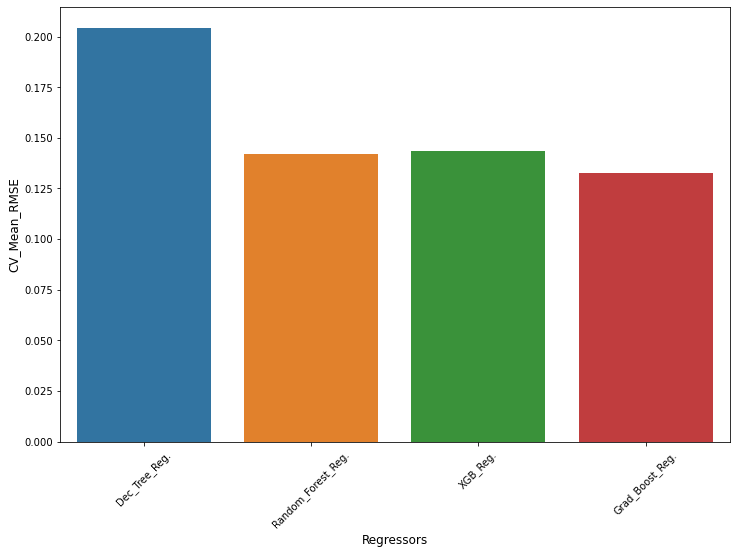

In [169]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [170]:

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [199]:
rf = RandomForestRegressor(bootstrap= False,
                    ccp_alpha= 0.0,
                    criterion= 'mse',
                    max_depth= 6,
                    max_features= 8,
                    max_leaf_nodes= None,
                    max_samples= None,
                    min_samples_leaf= 1,
                    min_samples_split= 2,
                    n_estimators= 500,
                    random_state= 42)

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=6, max_features=8,
                      n_estimators=500, random_state=42)

In [200]:
train_baseline_rf = rf.predict(X_train)
RMSE_train4 = np.sqrt(mean_squared_error(y_train, train_baseline_rf))
MAE_train4 = mean_absolute_error(y_train, train_baseline_rf)


test_baseline_rf = rf.predict(X_test)
RMSE_test4 = np.sqrt(mean_squared_error(y_test,test_baseline_rf))
MAE_test4 = mean_absolute_error(y_test,test_baseline_rf)

print("R^2 for train data is: %.3f" %(rf.score(X_train, y_train)))
print("R^2 for test data is: %.3f" %(rf.score(X_test,y_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train4)
print("RMSE for test data is: %.3f" % RMSE_test4)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train4)
print("MAE for test data is: %.4f" % MAE_test4)

R^2 for train data is: 0.863
R^2 for test data is: 0.827
--------------------------------------------------
RMSE for train data is: 0.149
RMSE for test data is: 0.164
--------------------------------------------------
MAE for train data is: 0.1058
MAE for test data is: 0.1128


Text(0.5, 1.0, 'Feature Importance Plot for XG Boosting')

<Figure size 1080x1440 with 0 Axes>

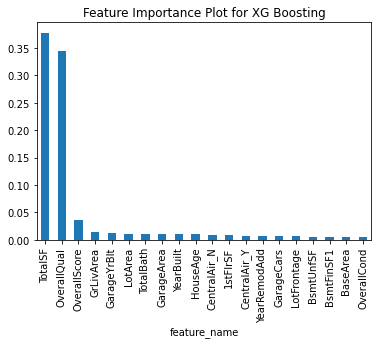

In [182]:
sorted_importance = sorted(zip(X_train.columns, random_forest.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

# create bar chart of XGBoost sorted important features
plt.figure(figsize = ((15, 20)))
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).head(20).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (6,4))
plt.title('Feature Importance Plot for XG Boosting')

(9.5, -0.5)

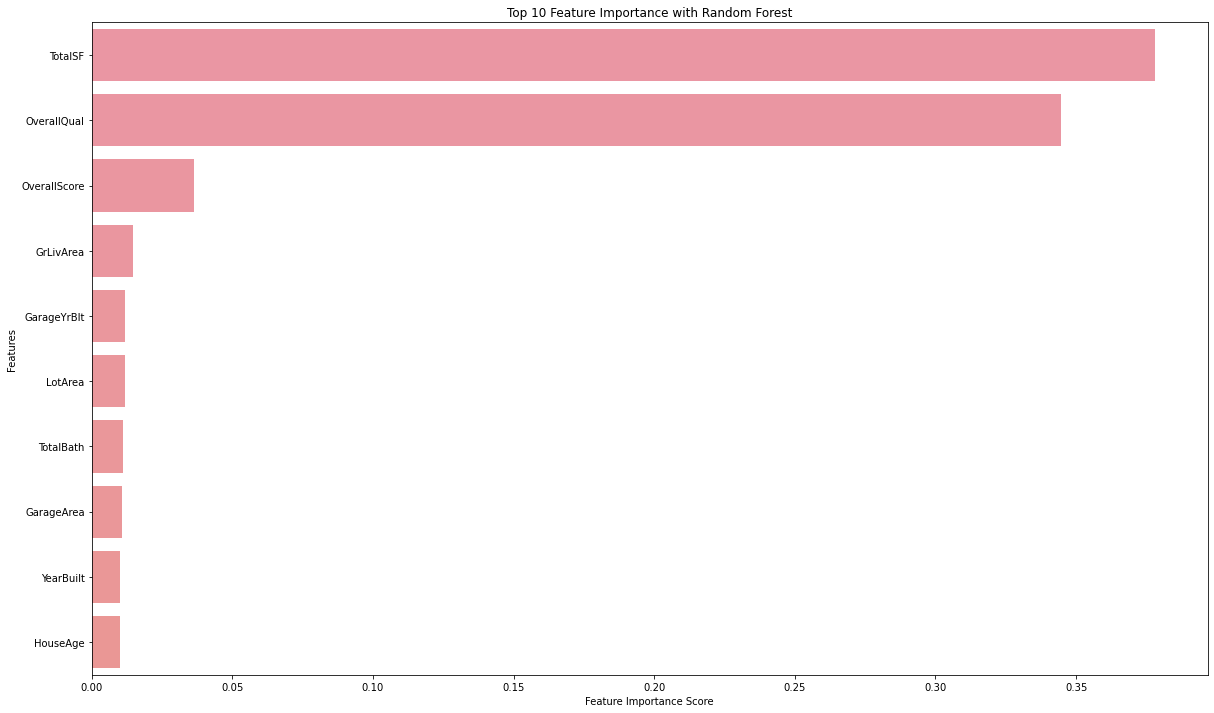

In [185]:
#feature importance graph
sorted_importance = sorted(zip(X_train.columns, random_forest.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (20,12))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

In [186]:
gbm = GradientBoostingRegressor(n_estimators=1000,
                                 learning_rate=0.01,
                                 max_depth=2,
                                 max_features=15)

gbm.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=15,
                          n_estimators=1000)

In [190]:
train_baseline_gbm = gbm.predict(X_train)
RMSE_train5 = np.sqrt(mean_squared_error(y_train, train_baseline_gbm))
MAE_train5 = mean_absolute_error(y_train, train_baseline_gbm)


test_baseline_gbm = gbm.predict(X_test)
RMSE_test5 = np.sqrt(mean_squared_error(y_test,test_baseline_gbm))
MAE_test5 = mean_absolute_error(y_test,test_baseline_gbm)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(gbm.score(X_train, y_train)))
print("R^2 for test data is: %.3f" %(gbm.score(X_test,y_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train5)
print("RMSE for test data is: %.3f" % RMSE_test5)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train5)
print("MAE for test data is: %.4f" % MAE_test5)

Final Values: 
R^2 for train data is: 0.934
R^2 for test data is: 0.896
--------------------------------------------------
RMSE for train data is: 0.103
RMSE for test data is: 0.127
--------------------------------------------------
MAE for train data is: 0.0741
MAE for test data is: 0.0873


(9.5, -0.5)

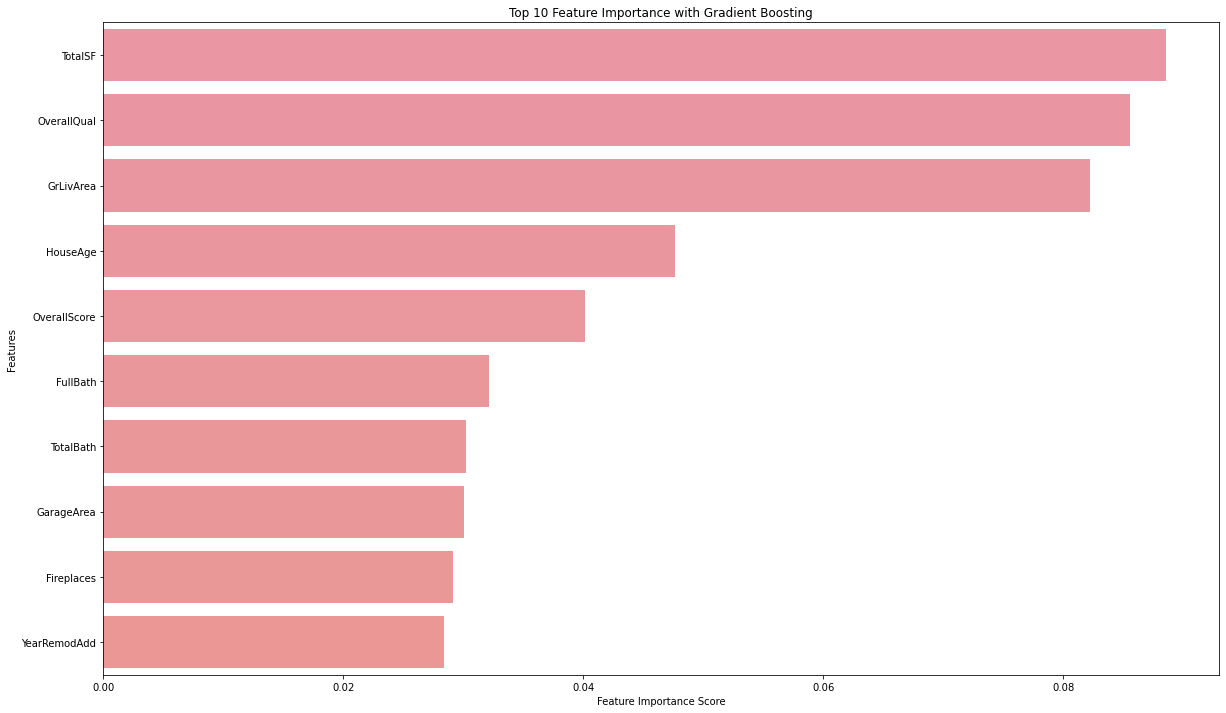

In [198]:
sorted_importance = sorted(zip(X_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (20,12))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with Gradient Boosting')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

In [193]:
xgb= XGBRegressor(colsample_bytree= 0.8,
                        gamma= 0,
                        learning_rate=0.01,
                        max_depth= 6,
                        min_child_weight= 1,
                        n_estimators= 1000,
                        random_state=1,
                        reg_alpha= 0,
                        subsample= 0.8)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
train_baseline_xgb = xgb.predict(X_train)
RMSE_train6 = np.sqrt(mean_squared_error(y_train, train_baseline_xgb))
MAE_train6 = mean_absolute_error(y_train, train_baseline_xgb)


test_baseline_xgb = xgb.predict(X_test)
RMSE_test6 = np.sqrt(mean_squared_error(y_test,test_baseline_xgb))
MAE_test6 = mean_absolute_error(y_test,test_baseline_xgb)


print("Final Values: ")
print("R^2 for train data is: %.3f" %(xgb.score(X_train, y_train)))
print("R^2 for test data is: %.3f" %(xgb.score(X_test,y_test)))
print("-" * 50)
print("RMSE for train data is: %.3f" % RMSE_train6)
print("RMSE for test data is: %.3f" % RMSE_test6)
print("-" * 50)
print("MAE for train data is: %.4f" % MAE_train6)
print("MAE for test data is: %.4f" % MAE_test6)

Final Values: 
R^2 for train data is: 0.991
R^2 for test data is: 0.904
--------------------------------------------------
RMSE for train data is: 0.039
RMSE for test data is: 0.122
--------------------------------------------------
MAE for train data is: 0.0293
MAE for test data is: 0.0801


(9.5, -0.5)

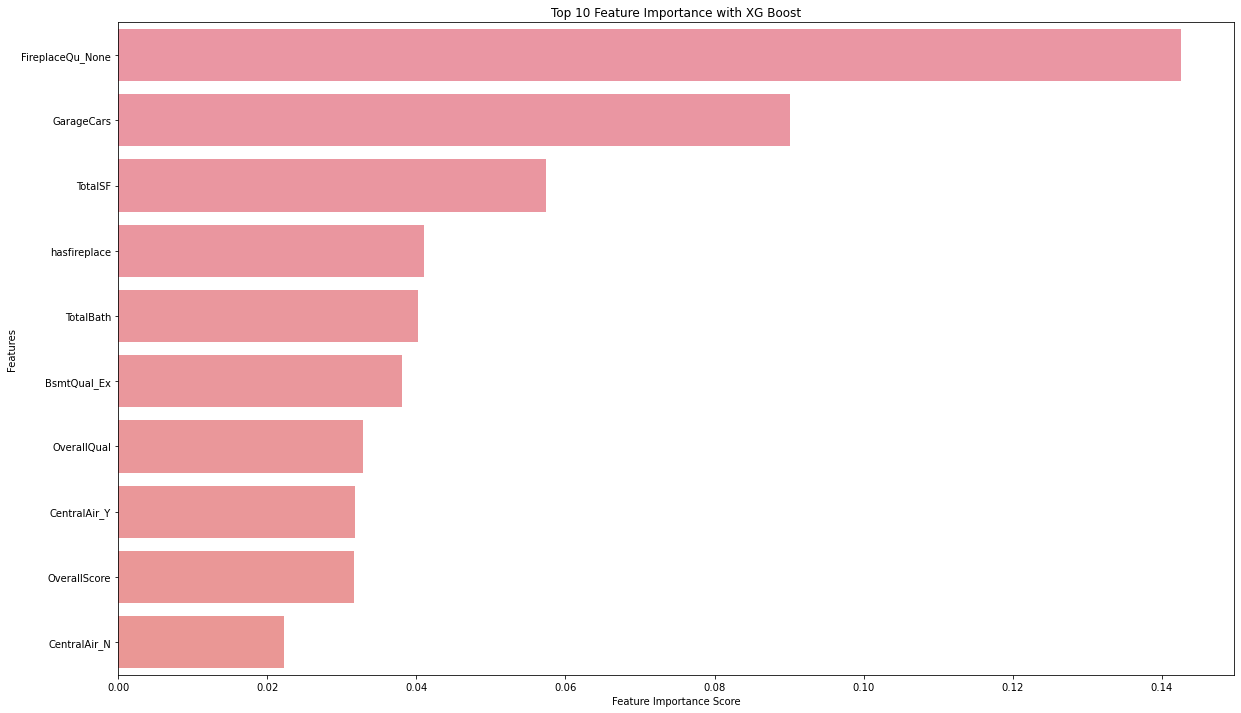

In [197]:
sorted_importance = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (20,12))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
ax = sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Top 10 Feature Importance with XG Boost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.ylim(bottom=(9.5,-0.5))

In [17]:
target = data_w['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
data_w2 = data_w.drop(['SalePrice'], axis = 1)

In [18]:
train_test = pd.concat([data_w2,test], axis=0, sort=False)

In [19]:
nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc(%),Usability
Electrical,1,Electrical,0.068493,Keep
TotalBsmtSF,2,TotalBsmtSF,0.136986,Keep
GarageArea,2,GarageArea,0.136986,Keep
GarageCars,2,GarageCars,0.136986,Keep
KitchenQual,2,KitchenQual,0.136986,Keep
BsmtUnfSF,2,BsmtUnfSF,0.136986,Keep
BsmtFinSF2,2,BsmtFinSF2,0.136986,Keep
BsmtFinSF1,2,BsmtFinSF1,0.136986,Keep
SaleType,2,SaleType,0.136986,Keep
Exterior1st,2,Exterior1st,0.136986,Keep


In [20]:

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Filling Categorical NaN (That we know how to fill due to the description file )

train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0       1.0
0    1461.0
0       NaN
Name: Id, dtype: float64
0    RL
0    RH
0    RH
Name: MSZoning, dtype: object
0    65.0
0    80.0
0    80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0       None
0       None
Name: MasVnrType, dtype: object
0    196.0
0      0.0
0      0.0
Name: MasVnrArea, dtype: float64
0    706.0
0    468.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    150.0
0    270.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    856.0
0    882.0
0    882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    2003.0
0    1961.0
0    1961.0
Name: GarageYrBlt, dtype: float64


In [21]:
from sklearn.neighbors import KNeighborsRegressor
useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

In [24]:
from scipy.stats import skew, norm
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test)

# Fetch all numeric features

#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

In [27]:
target_log = np.log1p(target)


In [31]:
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [32]:

train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test['Id'] = test_id

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [38]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

# lreg = LinearRegression()
# score_lreg = cv_rmse(lreg)
# cv_scores.append(score_lreg.mean())
# cv_std.append(score_lreg.std())


# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

ValueError: Found input variables with inconsistent numbers of samples: [2930, 2919]